In [ ]:
#import libraries
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score

In [ ]:
#size of images
IMAGE_SIZE=[224,224]

In [ ]:
#dowloading vgg16 model from keras
#image is of shape(224,224,3)
#using pretrained weights
#removing input and output layer
model=InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#avoid retraining of weights and using pretrained weights
for layers in model.layers:
  layers.trainable=False

In [ ]:
#Custumizing output layer as per classes present
x=Flatten()(model.output)
prediction=Dense(4,activation='softmax')(x)
model=Model(inputs=model.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#optimizer for model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
#data augmentation on training dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
#data augmentation on testing dataset
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
#mouting drive for working with files and datset
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/AllModels

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [ ]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [ ]:
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [ ]:
train_path='train'
validation_path='test'

In [ ]:
#assigning batch size, image size, class mode for training dataset images
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4106 images belonging to 4 classes.


In [ ]:
#assigning batch size, image size, class mode for validation dataset images
validation_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 406 images belonging to 4 classes.


In [ ]:
#model training and storing its details in histroy
history=model.fit(train_set, validation_data=validation_set, epochs=10)

Epoch 1/10
129/129 [==============================] - 999s 8s/step - loss: 0.4127 - accuracy: 0.8880 - val_loss: 0.1731 - val_accuracy: 0.9606
Epoch 2/10
129/129 [==============================] - 64s 493ms/step - loss: 0.0654 - accuracy: 0.9783 - val_loss: 0.0883 - val_accuracy: 0.9828
Epoch 3/10
129/129 [==============================] - 61s 473ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.1308 - val_accuracy: 0.9729
Epoch 4/10
129/129 [==============================] - 61s 471ms/step - loss: 0.0288 - accuracy: 0.9890 - val_loss: 0.1412 - val_accuracy: 0.9754
Epoch 5/10
129/129 [==============================] - 62s 482ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.1032 - val_accuracy: 0.9778
Epoch 6/10
129/129 [==============================] - 61s 472ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.1225 - val_accuracy: 0.9852
Epoch 7/10
129/129 [==============================] - 61s 476ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.1058 - val_accu

In [ ]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [ ]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [ ]:
%cd InceptionV3

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3


In [ ]:
model.save('(10 Epoch)inceptionv3.h5')

In [ ]:
#load the trained weights of model
model.load_weights('(10 Epoch)inceptionv3.h5')

In [ ]:
#save to csv:
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10]
df1['epoch']=ls
hist_df = pd.DataFrame(history.history)
df=pd.concat([df1, hist_df], axis=1, join='inner')
hist_csv_file = '(10 Epoch)inceptionv3-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [ ]:
#for importing histroy from csv file
import pandas as pd
df=pd.read_csv('(10 Epoch)inceptionv3-history.csv')

In [ ]:
df

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.412678,0.887969,0.173085,0.960591
1,2,0.065406,0.978324,0.088327,0.982759
2,3,0.039212,0.987336,0.130837,0.972906
3,4,0.028780,0.989040,0.141217,0.975369
4,5,0.024546,0.991476,0.103199,0.977832
5,6,0.022322,0.992450,0.122518,0.985222
6,7,0.018947,0.993668,0.105802,0.977832
7,8,0.019507,0.993668,0.167989,0.977832
8,9,0.014747,0.994642,0.085650,0.980296
9,10,0.020677,0.994398,0.070127,0.985222


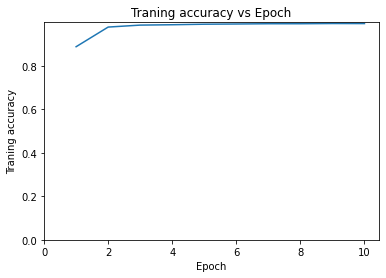

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df['epoch'],df['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Traning accuracy vs Epoch',dpi=300);
plt.show()

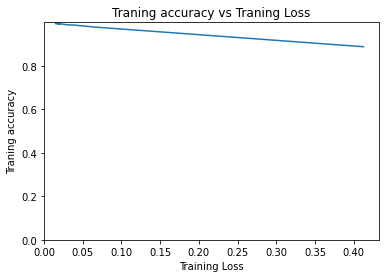

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df['loss'],df['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Traning accuracy vs Traning Loss',dpi=300);
plt.show()

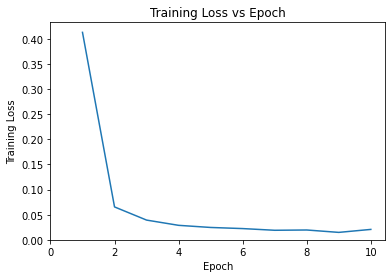

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df['epoch'],df['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Training Loss vs Epoch',dpi=300);
plt.show()

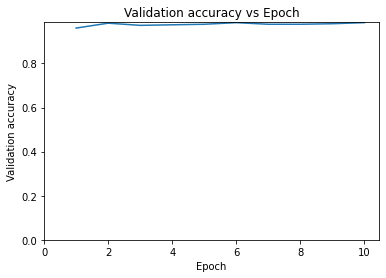

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df['epoch'],df['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Validation accuracy vs Epoch',dpi=300);
plt.show()

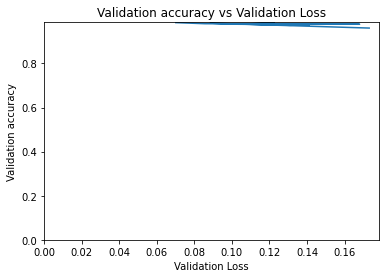

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df['val_loss'],df['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Validation accuracy vs Validation Loss',dpi=300);
plt.show()

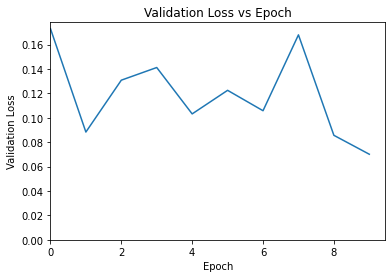

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(10 Epoch)Validation Loss vs Epoch',dpi=300);
plt.show()

In [ ]:
%ls

'(10 Epoch)HeatMap visualization'/
'(10 Epoch)inceptionv3-binary_classification.csv'
'(10 Epoch)inceptionv3.h5'
'(10 Epoch)inceptionv3-history.csv'
'(10 Epoch)InceptionV3.ipynb'
'(10 Epoch)inceptionv3-roc_data.csv'
'(10 Epoch)InceptionV3 ROC(Micro averaged).png'
'(10 Epoch)incpetionv3.h5'
'(10 Epoch)Multiclass ROC.png'
'(10 Epoch)Training Loss vs Epoch.png'
'(10 Epoch)Traning accuracy vs Epoch.png'
'(10 Epoch)Traning accuracy vs Traning Loss.png'
'(10 Epoch)Validation accuracy vs Epoch.png'
'(10 Epoch)Validation accuracy vs Validation Loss.png'
'(10 Epoch)Validation Loss vs Epoch.png'
'(15 Epoch)inceptionv3-binary_classification.csv'
'(15 Epoch)inceptionv3.h5'
'(15 Epoch)inceptionv3-history.csv'
'(15 Epoch)InceptionV3.ipynb'
'(15 Epoch)inceptionv3-roc_data.csv'
'(15 Epoch)InceptionV3 ROC(Micro averaged).png'
'(15 Epoch)Multiclass ROC.png'
'(15 Epoch)Training Loss vs Epoch.png'
'(15 Epoch)Traning accuracy vs Epoch.png'
'(15 Epoch)Traning accuracy vs Traning Loss.png'
'(15 Epoch)Validati

In [ ]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [ ]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [ ]:
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [ ]:
import imutils
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
import tensorflow as tf
import cv2

In [ ]:
#Function to return time which will be useful for obtaining inference time
import time

def current_milli_time():
    return round(time.time() * 1000)

In [ ]:
#path of 4 sample images from different direction for each class
image_path=["all/apple_lab_0.jpg","all/apple_lab_5.jpg","all/apple_lab_8.jpg","all/apple_lab_52.jpg","all/sophos_lab_0.jpg","all/sophos_lab_2.jpg","all/sophos_lab_132.jpg","all/sophos_lab_152.jpg","all/sophos_rack_1.jpg","all/sophos_rack_2.jpg","all/sophos_rack_29.jpg","all/sophos_rack_37.jpg","all/vr_lab_1.jpg","all/vr_lab_5.jpg","all/vr_lab_6.jpg","all/vr_lab_49.jpg"]

In [ ]:
#model prediction for random image from  which was nither use for traning and validation
#random image containing dataset is used of 4 class: apple lab, sophos lab, sophos rack and vr lab
#time before prediction and after prediction of image is recorded for calculating inference time

resized=[]
label=[]
y_pred=[]
x=[]
y=[]
img=[]
for i in range(0,16):
  img.append(load_img(image_path[i],target_size=(224,224)));
  resized.append(img[i])
  img[i]=np.asarray(img[i])
  img[i]=img[i]/255.0

  x.append(current_milli_time())
  y_pred.append(model.predict(img[i].reshape(1, 224, 224, 3)))
  y.append(current_milli_time())
  label.append(y_pred[i].argmax())
  if label[i]==0:
    temp="apple lab"
  elif label[i]==1:
    temp="sophos lab"
  elif label[i]==2:
    temp="sophos rack"
  else:
    temp="vr lab"
  label[i] = "{}: {:.2f}%".format(temp, y_pred[i][0][label[i]] * 100)

In [ ]:
model.layers[-1].activation = None
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

Our model says it is a : [[1.4908377e-05 5.6853332e-05 3.3999008e-06 9.9992478e-01]]
[INFO] vr lab: 99.99%


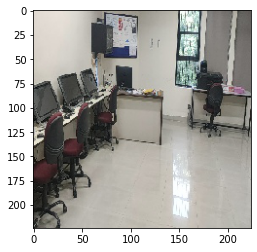

In [ ]:
plt.imshow(img[12])
print("Our model says it is a :",y_pred[12])
print("[INFO] {}".format(label[12]))

In [ ]:
#Inference time
y[12]-x[12]

58

In [ ]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[12]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
image = image/255.0

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[12])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image

heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)


In [ ]:
%cd ..
%cd InceptionV3
%cd (10 Epoch)HeatMap visualization

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization


In [ ]:
%ls

'Apple lab'/  'Sophos lab'/  'Sophos rack'/  'VR lab'/


In [ ]:
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization/VR lab


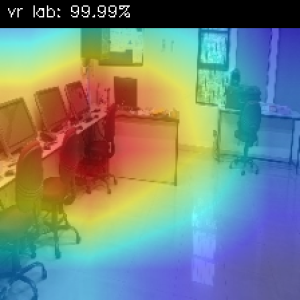

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[12], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
#save the image
# cv2.imwrite("1.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[8.2341124e-08 1.0513170e-10 7.6044315e-17 9.9999988e-01]]
[INFO] vr lab: 100.00%


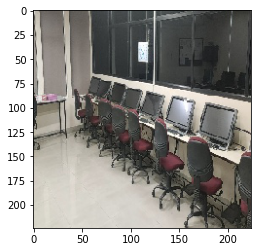

In [ ]:
plt.imshow(img[13])
print("Our model says it is a :",y_pred[13])
print("[INFO] {}".format(label[13]))

In [ ]:
#Inference time
y[13]-x[13]

58

In [ ]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[13]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
image = image/255.0

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[13])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [ ]:
%cd ..
%cd InceptionV3
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization/VR lab


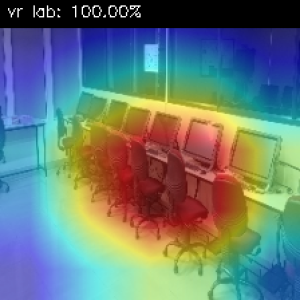

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[13], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
# cv2.imwrite("2.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[2.0194357e-05 7.0921073e-09 6.8397328e-09 9.9997985e-01]]
[INFO] vr lab: 100.00%


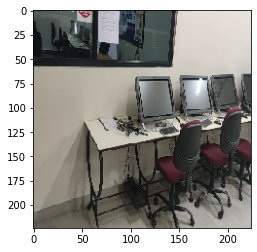

In [ ]:
plt.imshow(img[14])
print("Our model says it is a :",y_pred[14])
print("[INFO] {}".format(label[14]))

In [ ]:
#Inference time
y[14]-x[14]

57

In [ ]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[14]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
image = image/255.0

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[14])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [ ]:
%cd ..
%cd InceptionV3
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization/VR lab


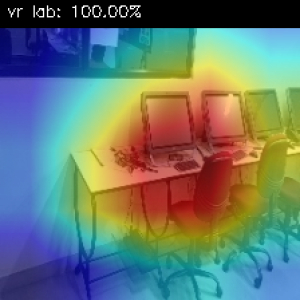

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[14], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
# cv2.imwrite("3.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[3.5152011e-06 4.5313855e-06 7.4975860e-06 9.9998438e-01]]
[INFO] vr lab: 100.00%


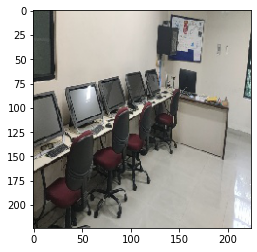

In [ ]:
plt.imshow(img[15])
print("Our model says it is a :",y_pred[15])
print("[INFO] {}".format(label[15]))

In [ ]:
#Inference time
y[15]-x[15]

60

In [ ]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[15]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
image = image/255.0

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[15])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [ ]:
%cd ..
%cd InceptionV3
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization/VR lab


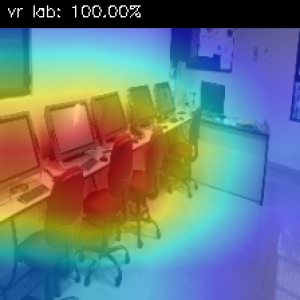

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[15], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
# cv2.imwrite("4.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [ ]:
#image prediction on train dataset images and storing it in array containing result of prediction done by model
#class 0: apple lab
#class 1: sophos lab
#class 2: sophos rack
#class 3: apple lab

import os

x_train=[]#contains images after applying argmax on one hot encoded representation  which will have class predicted for all train dataset images


#apple lab image prediction code
sub_path=train_path+"/apple_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)
    img_arr=img_arr/255.0

    y_pred=model.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train.extend(y_pred)


#sophos lab image prediction code
sub_path=train_path+"/sophos_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)
    img_arr=img_arr/255.0

    y_pred=model.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train.extend(y_pred)


#sophos rack image prediction code
sub_path=train_path+"/sophos_rack"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)
    img_arr=img_arr/255.0

    y_pred=model.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train.extend(y_pred)


#vr lab image prediction code
sub_path=train_path+"/vr_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)
    img_arr=img_arr/255.0

    y_pred=model.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train.extend(y_pred)

Streaming output truncated to the last 5000 lines.
train/sophos_lab/sophos_whole_889.jpg
[1]
train/sophos_lab/sophos_whole_428.jpg
[1]
train/sophos_lab/sophos_whole_7.jpg
[1]
train/sophos_lab/sophos_whole_459.jpg
[1]
train/sophos_lab/sophos_whole_863.jpg
[1]
train/sophos_lab/sophos_whole_1758.jpg
[1]
train/sophos_lab/sophos_whole_528.jpg
[1]
train/sophos_lab/sophos_whole_1363.jpg
[1]
train/sophos_lab/sophos_whole_1168.jpg
[1]
train/sophos_lab/sophos_whole_1533.jpg
[1]
train/sophos_lab/sophos_whole_1385.jpg
[1]
train/sophos_lab/sophos_whole_13.jpg
[1]
train/sophos_lab/sophos_whole_156.jpg
[1]
train/sophos_lab/sophos_whole_1691.jpg
[1]
train/sophos_lab/sophos_whole_2186.jpg
[1]
train/sophos_lab/sophos_whole_2183.jpg
[1]
train/sophos_lab/sophos_whole_2227.jpg
[1]
train/sophos_lab/sophos_whole_61.jpg
[1]
train/sophos_lab/sophos_whole_423.jpg
[1]
train/sophos_lab/sophos_whole_1030.jpg
[1]
train/sophos_lab/sophos_whole_113.jpg
[1]
train/sophos_lab/sophos_whole_1364.jpg
[1]
train/sophos_lab/s

In [ ]:
#image prediction on unlabled dataset images and storing it in array containing result of prediction done by model
x_test=[]#contains images after applying argmax on one hot encoded representation  which will have class predicted for all train dataset images


#apple lab image prediction code
sub_path= "all"
path=[]
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img
    path.append(image_path)
path.sort()
for img in path:
    img_arr=load_img(img,target_size=(224,224));
    img_arr=np.asarray(img_arr)
    img_arr=img_arr/255.0

    y_pred=model.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test.extend(y_pred)

all/apple_lab_0.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_104.jpg
[0]
all/apple_lab_105.jpg
[0]
all/apple_lab_106.jpg
[0]
all/apple_lab_107.jpg
[0]
all/apple_lab_108.jpg
[0]
all/apple_lab_109.jpg
[0]
all/apple_lab_11.jpg
[0]
all/apple_lab_110.jpg
[0]
all/apple_lab_111.jpg
[0]
all/apple_lab_112.jpg
[0]
all/apple_lab_113.jpg
[0]
all/apple_lab_114.jpg
[0]
all/apple_lab_115.jpg
[0]
all/apple_lab_116.jpg
[0]
all/apple_lab_117.jpg
[0]
all/apple_lab_118.jpg
[0]
all/apple_lab_119.jpg
[0]
all/apple_lab_12.jpg
[0]
all/apple_lab_120.jpg
[0]
all/apple_lab_121.jpg
[0]
all/apple_lab_122.jpg
[0]
all/apple_lab_123.jpg
[0]
all/apple_lab_124.jpg
[0]
all/apple_lab_125.jpg
[0]
all/apple_lab_126.jpg
[0]
all/apple_lab_127.jpg
[0]
all/apple_lab_128.jpg
[0]
all/apple_lab_129.jpg
[0]
all/apple_lab_13.jpg
[0]
all/apple_lab_130.jpg
[0]
all/apple_lab_131.jpg
[0]
all/apple_lab_132.jp

In [ ]:
#storing actual classes in array for all train dataset images
train_y=train_set.classes
train_y

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
import pandas as pd
df=pd.read_csv("test.csv")

In [ ]:
df

,labels
0,0
1,0
2,0
3,0
4,0
...,...
398,3
399,3
400,3
401,3


In [ ]:
test_y=df['labels']

In [ ]:
#classification report and confusion matrix made using predicted image class and acutal image class(on both training and testing dataset)

import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow
print("For Training")
#get classification report
print(classification_report(x_train,train_y))
#get confusion matrix
print(confusion_matrix(x_train,train_y))
print("")
print("For Testing")
#get classification report
print(classification_report(x_test,test_y))
#get confusion matrix
print(confusion_matrix(x_test,test_y))

For Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       1.00      1.00      1.00      1987
           2       1.00      1.00      1.00       431
           3       0.99      1.00      1.00       833

    accuracy                           1.00      4106
   macro avg       1.00      1.00      1.00      4106
weighted avg       1.00      1.00      1.00      4106

[[ 852    0    0    3]
 [   1 1983    1    2]
 [   0    0  431    0]
 [   0    0    0  833]]

For Testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       0.99      1.00      0.99       167
           2       1.00      0.95      0.97        40
           3       1.00      1.00      1.00        50

    accuracy                           1.00       403
   macro avg       1.00      0.99      0.99       403
weighted avg       1.00      1.00      0.99       403

[[146   0  

In [ ]:
#accuracy score for training datset
print("Training")
accuracy_score(x_train,train_y)

Training


0.998295177788602

In [ ]:
#accuracy score for testing datset
print("Testing")
accuracy_score(x_test, test_y)

Testing


0.9950372208436724

In [ ]:
#macro averaged F1 score
from sklearn.metrics import f1_score
f1_score(x_test,test_y,average='macro')

0.9921016483516484

In [ ]:
#macro averaged recall score
from sklearn.metrics import recall_score
recall_score(x_test,df['labels'],average='macro')

0.9875

In [ ]:
#macro averaged precision score
from sklearn.metrics import precision_score
precision_score(x_test, test_y,average='macro')

0.9970414201183432

In [ ]:
%ls

all/  Logs/  test/  test.csv  train/


In [ ]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [ ]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [ ]:
%cd InceptionV3

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/InceptionV3


In [ ]:
#function which will return number of flops for a model
import tensorflow as tf

def get_flops(model_h5_path):
    session = tf.compat.v1.Session()
    graph = tf.compat.v1.get_default_graph()


    with graph.as_default():
        with session.as_default():
            model = tf.keras.models.load_model(model_h5_path)

            run_meta = tf.compat.v1.RunMetadata()
            opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()

            # We use the Keras session graph in the call to the profiler.
            flops = tf.compat.v1.profiler.profile(graph=graph,
                                                  run_meta=run_meta, cmd='op', options=opts)

            return flops.total_float_ops

In [ ]:
#find and display number of flops in classfication model
tf.compat.v1.reset_default_graph()
print(get_flops('(10 Epoch)inceptionv3.h5'))

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
21956035


In [ ]:
#here binary classification is done that is wether image belongs to class 0(apple lab) or not
#converting predicted class 0 to 1 and rest to 0 and storing it in x_test1 list
#converting actual class 0 to 1 and rest to 0 and storing it in test_y1 list
x_test1 = [x for x in x_test]
for i in range (len(x_test)):
  if(x_test[i]==0):
    x_test1[i]=1
  else:
    x_test1[i]=0
test_y1 = [x for x in test_y]
for i in range (len(x_test)):
  if(test_y[i]==0):
    test_y1[i]=1
  else:
    test_y1[i]=0

In [ ]:
#predicted binary classification where it belong to class 0(apple lab) or not
#array contains 1 where class 0(apple lab) is predicted and rest as 0
test_y1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#actual binary lable whether it belongs to class 0 or not
#array contains 1 where class 0(apple lab) is actual for that perticular image and rest as 0
x_test1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#here binary classification is done that is wether image belongs to class 1(sophos lab) or not
#converting predicted class 1 to 1 and rest to 0 and storing it in x_test2 list
#converting actual class 1 to 1 and rest to 0 and storing it in test_y2 list
x_test2 = [x for x in x_test]
for i in range (len(x_test)):
  if(x_test[i]==1):
    x_test2[i]=1
  else:
    x_test2[i]=0
test_y2 = [x for x in test_y]
for i in range (len(x_test)):
  if(test_y[i]==1):
    test_y2[i]=1
  else:
    test_y2[i]=0

In [ ]:
#here binary classification is done that is wether image belongs to class 2(sophos rack) or not
#converting predicted class 2 to 1 and rest to 0 and storing it in x_test3 list
#converting actual class 2 to 1 and rest to 0 and storing it in test_y3 list
x_test3 = [x for x in x_test]
for i in range (len(x_test)):
  if(x_test[i]==2):
    x_test3[i]=1
  else:
    x_test3[i]=0
test_y3 = [x for x in test_y]
for i in range (len(x_test)):
  if(test_y[i]==2):
    test_y3[i]=1
  else:
    test_y3[i]=0

In [ ]:
#here binary classification is done that is wether image belongs to class 3(vr lab) or not
#converting predicted class 3 to 1 and rest to 0 and storing it in x_test4 list
#converting actual class 3 to 1 and rest to 0 and storing it in test_y4 list
x_test4 = [x for x in x_test]
for i in range (len(x_test)):
  if(x_test[i]==3):
    x_test4[i]=1
  else:
    x_test4[i]=0
test_y4 = [x for x in test_y]
for i in range (len(x_test)):
  if(test_y[i]==3):
    test_y4[i]=1
  else:
    test_y4[i]=0

In [ ]:
#storing all predicted and actual binary classifiction in dataframe
import pandas as pd
df1 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df1['x_test1']=x_test1
df1['x_test2']=x_test2
df1['x_test3']=x_test3
df1['x_test4']=x_test4

df1['y_test1']=test_y1
df1['y_test2']=test_y2
df1['y_test3']=test_y3
df1['y_test4']=test_y4

df1

,x_test1,y_test1,x_test2,y_test2,x_test3,y_test3,x_test4,y_test4
0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
398,0,0,0,0,0,0,1,1
399,0,0,0,0,0,0,1,1
400,0,0,0,0,0,0,1,1
401,0,0,0,0,0,0,1,1


In [ ]:
#storing all predicted and actual binary classifiction in csv file
hist_df = pd.DataFrame(df1)
hist_csv_file = '(10 Epoch)inceptionv3-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#finding roc_curve and auc by finding false positive, true positive, and threshold for all binary classfication(done above)
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
fpr = {}
tpr = {}
thresh ={}

n_class = 4

fpr[0], tpr[0], thresh[0] = roc_curve(test_y1,x_test1)
auc1=auc(fpr[0],tpr[0])
fpr[1], tpr[1], thresh[1] = roc_curve(test_y2,x_test2)
auc2=auc(fpr[1],tpr[1])
fpr[2], tpr[2], thresh[2] = roc_curve(test_y3,x_test3)
auc3=auc(fpr[2],tpr[2])
fpr[3], tpr[3], thresh[3] = roc_curve(test_y4,x_test4)
auc4=auc(fpr[3],tpr[3])

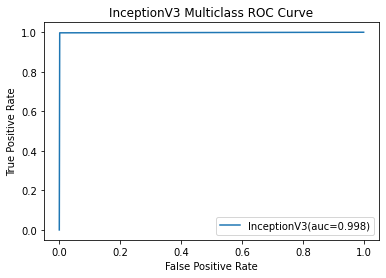

In [ ]:
#macro averaged roc curve
macro_averaged_fpr=(fpr[0]+fpr[1]+fpr[2]+fpr[3])/4
macro_averaged_tpr=(tpr[0]+tpr[1]+tpr[2]+tpr[3])/4
auc_avg=auc(macro_averaged_fpr,macro_averaged_tpr)
plt.plot(macro_averaged_fpr,macro_averaged_tpr,label='InceptionV3(auc=%0.3f)'%auc_avg)
plt.title('InceptionV3 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(10 Epoch)InceptionV3 ROC(Micro averaged)',dpi=300);

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2 = pd.DataFrame(columns=['fpr','tpr'])

df2['fpr']=[fpr[0],fpr[1],fpr[2],fpr[3],macro_averaged_fpr]
df2['tpr']=[tpr[0],tpr[1],tpr[2],tpr[3],macro_averaged_tpr]

df2

hist_df = pd.DataFrame(df2)
hist_csv_file = '(10 Epoch)inceptionv3-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

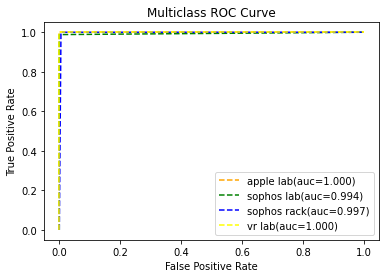

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1)
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2)
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3)
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(10 Epoch)Multiclass ROC',dpi=300);